In [131]:
import numpy as np 
import pandas as pd 
import numpy as np 
import pandas as pd
import xarray as xr
import openpyxl
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import *
import matplotlib.colors as colors
from scipy import stats 
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point


In [132]:
sourceData='/bettik/amoryc/MARout/GRa/spin2/work/'
variable1='TT' ##RF;SF;SHSN3;TT
fileNameM='mon-TT-MARv3.14_ER5-2000-2023.nc' ##change to monthly
dsM= xr.open_dataset(sourceData+fileNameM)['TT']

In [133]:


sourceData1='/bettik/amoryc/MARout/GRa/spin2/work/'
dsM_SF= xr.open_dataset(sourceData1+'mon-SF-MARv3.14_ER5-2000-2023.nc')['SF']
dsM_RF= xr.open_dataset(sourceData1+'mon-RF-MARv3.14_ER5-2000-2023.nc')['RF']



In [134]:
## Model MAR
sourceDataGrid='/home/amoryc/'
#fileName_grF='NST.2000.01.01.00.GRa_Fedchenko.nc'
fileName_grM='NST.2000.01.01.00.GRa_Mera.nc_ICEmask'
ds_grM= xr.open_dataset(sourceDataGrid+fileName_grM)

In [135]:
#Gra Mera 5km
sourceData='/bettik/amoryc/MARout/GRa/spin2/work/'
variable='TT' ##RF;SF;SHSN3;TT
fileNameM='mon-TT-MARv3.14_ER5-2000-2023.nc' ##change to monthly
dsM= xr.open_dataset(sourceData+fileNameM)['TT'][:,1,:,:] ## montlhy mean

In [136]:
###
#AWS-Mera La: Since November 2013 (AWS inserted on firm rocks – off-glacier)
#Location in WGS84, Lat: 27.735°N; Long: 86.900°E; Elevation: 5352.008 m 
#or UTM Zone 45; Easting: 490137.007 m; Northing: 3067850.613 m on 22/11/2020
###
lon_Pyramide=86.81296905961787
lat_Pyramide=27.957821815535848
elev_Pyramide=5035
##Find the pixel of MAR corresponding to station
target_lon = lon_Pyramide
target_lat = lat_Pyramide
lon=ds_grM.LON
lat=ds_grM.LAT

In [137]:
#Step 2: Find the nearest grid point to target_lon,target_lat
# Compute distance to each grid point
dist = np.sqrt((lon - target_lon)**2 + (lat - target_lat)**2)
print(dist)
j, i = np.unravel_index(dist.argmin(), dist.shape)

<xarray.DataArray (y: 116, x: 164)> Size: 76kB
array([[5.291007 , 5.244591 , 5.198241 , ..., 3.785481 , 3.82819  ,
        3.87107  ],
       [5.2751756, 5.2286024, 5.1820917, ..., 3.762444 , 3.805415 ,
        3.8485878],
       [5.259681 , 5.2129354, 5.1662645, ..., 3.7397993, 3.783051 ,
        3.8264894],
       ...,
       [5.899335 , 5.8552537, 5.811295 , ..., 4.5065866, 4.54464  ,
        4.5829506],
       [5.924019 , 5.8800936, 5.8363104, ..., 4.537948 , 4.5757694,
        4.613843 ],
       [5.948939 , 5.905187 , 5.861553 , ..., 4.569554 , 4.607124 ,
        4.644974 ]], shape=(116, 164), dtype=float32)
Coordinates:
  * x        (x) float32 656B -495.0 -490.0 -485.0 -480.0 ... 310.0 315.0 320.0
  * y        (y) float32 464B -195.0 -190.0 -185.0 -180.0 ... 370.0 375.0 380.0


In [138]:
#Step 3: Extract data at that location
# For a single time step
#value = dsM['SH'].isel(y=j, x=i)
## If there's a time dimension
dsM_sta=dsM[0:, i, j]
dsM_sta_precip=dsMP[0:, i, j]




dsM_sta_new2= dsM_sta.rename({'TIME': 'time'})
#units=dsM.units
dsM_sta_new= dsM_sta_new2.where(dsM_sta_new2.values <= 70)
#dsM_sta_new.values


In [139]:
#Evaluer la différence de hauteur entre la station et le niveau 1 de la grille MAR considérée
SH_sta=elev_Pyramide
value = ds_grM['SH'].isel(y=j, x=i)
diff=SH_sta-value.values
value.values,SH_sta, diff

(array(5116.77, dtype=float32), 5035, np.float32(-81.77002))

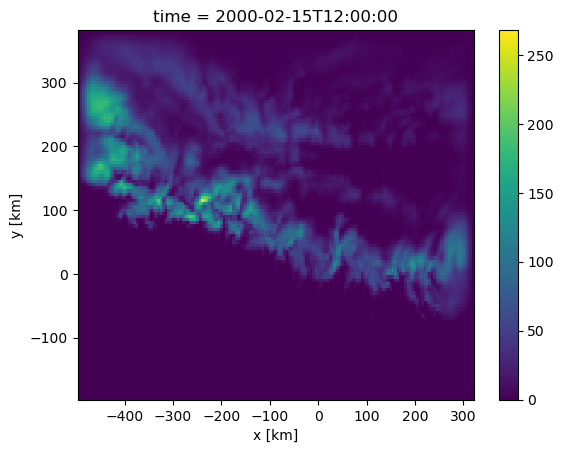

In [140]:
dsMP[1,:,:].plot()

In [141]:
dsM_SF = dsM_SF.rename({'TIME': 'time'})
dsM_RF = dsM_RF.rename({'TIME': 'time'})

In [142]:
#dsM_SF,dsM_RF

In [143]:
dsM_SF

<xarray.DataArray 'SF' (time: 288, Y: 116, X: 164)> Size: 22MB
[5478912 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 2kB 2000-01-16T12:00:00 ... 2023-12-16T12:...
  * X        (X) float32 656B -495.0 -490.0 -485.0 -480.0 ... 310.0 315.0 320.0
  * Y        (Y) float32 464B -195.0 -190.0 -185.0 -180.0 ... 370.0 375.0 380.0
Attributes:
    long_name:     Snowfall
    units:         mmWE/day
    cell_methods:  TIME: sum TIME: mean
    history:       From ICE.a98.2000.01.01-31

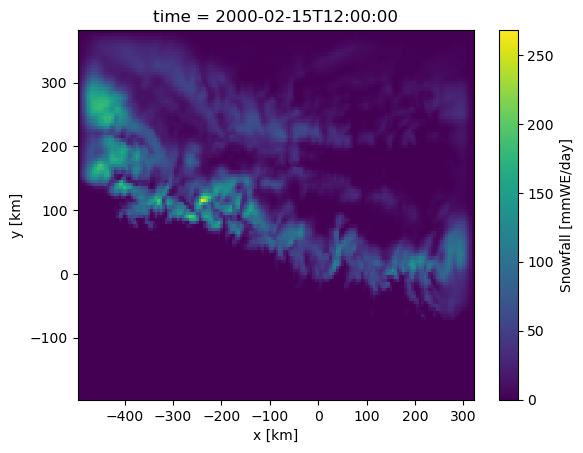

In [144]:
dsM_sta_precip_SnowFall=dsM_SF[0:, i, j]
dsM_SF[1,:,:].plot()

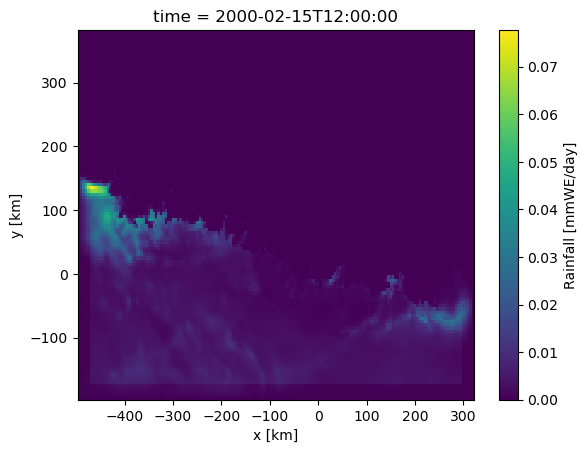

In [145]:
dsM_sta_precip_RainFall=dsM_RF[0:, i, j]
dsM_RF[1,:,:].plot()

In [146]:
#Définition des Saisons, et création d'une fonction qui définit les saisons en fonction des périodes des moussons:
seasons = {
	'MAM': [3, 4, 5],  	
	'JJAS': [6, 7, 8, 9],  
	'ON': [10, 11],    	
	'DJF': [12, 1, 2]  	
}
def seasonsdata(ds, season_name):  #monthly_meanTM.sel(time=monthly_meanTM['time'].dt.month.isin(seasons['MAM'])). Sélectionne dans le dataset les mois correspondants aux saisons définies au dessus

	x = seasons[season_name]
	return ds.sel(time=ds['time'].dt.month.isin(x))


In [147]:
Pr_Snow=dsM_sta_precip_SnowFall
Pr_Rain=dsM_sta_precip_RainFall

In [148]:
Pr_Snow_monthly_cycle=Pr_Snow.groupby('time.month').sum()

#dsM_sta_new


Pr_Snow_premon = seasonsdata(Pr_Snow, 'MAM').resample(time='YE').sum()

Pr_Snow_mon = seasonsdata(Pr_Snow, 'JJAS').resample(time='YE').sum()

Pr_Snow_postmon =  seasonsdata(Pr_Snow, 'ON').resample(time='YE').sum()

Pr_Snow_hiver  = seasonsdata(Pr_Snow, 'DJF').resample(time='YE').sum()


#Time series annual data MAR 
Timeseries_Pr_Snow_premon = seasonsdata(Pr_Snow, 'MAM').resample(time='YE').sum() # T moyen de chaque saison 
Timeseries_Pr_Snow_mon = seasonsdata(Pr_Snow, 'JJAS').resample(time='YE').sum()
Timeseries_Pr_Snow_postmon =  seasonsdata(Pr_Snow, 'ON').resample(time='YE').sum()
Timeseries_Pr_Snow_hiver  = seasonsdata(Pr_Snow, 'DJF').resample(time='YE').sum()



In [149]:
Pr_Rain_monthly_cycle=Pr_Rain.groupby('time.month').sum()

#dsM_sta_new


Pr_Rain_premon = seasonsdata(Pr_Rain, 'MAM').resample(time='YE').sum()

Pr_Rain_mon = seasonsdata(Pr_Rain, 'JJAS').resample(time='YE').sum()

Pr_Rain_postmon =  seasonsdata(Pr_Rain, 'ON').resample(time='YE').sum()

Pr_Rain_hiver  = seasonsdata(Pr_Rain, 'DJF').resample(time='YE').sum()


#Time series annual data MAR 
Timeseries_Pr_Rain_premon = seasonsdata(Pr_Rain, 'MAM').resample(time='YE').sum() # T moyen de chaque saison 
Timeseries_Pr_Rain_mon = seasonsdata(Pr_Rain, 'JJAS').resample(time='YE').sum()
Timeseries_Pr_Rain_postmon =  seasonsdata(Pr_Rain, 'ON').resample(time='YE').sum()
Timeseries_Pr_Rain_hiver  = seasonsdata(Pr_Rain, 'DJF').resample(time='YE').sum()



In [150]:
Pr_Rain

<xarray.DataArray 'RF' (time: 288)> Size: 1kB
[288 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 2kB 2000-01-16T12:00:00 ... 2023-12-16T12:...
    X        float32 4B -270.0
    Y        float32 4B 290.0
Attributes:
    long_name:     Rainfall
    units:         mmWE/day
    cell_methods:  TIME: mean
    history:       From ICE.a98.2000.01.01-31

<BarContainer object of 288 artists>

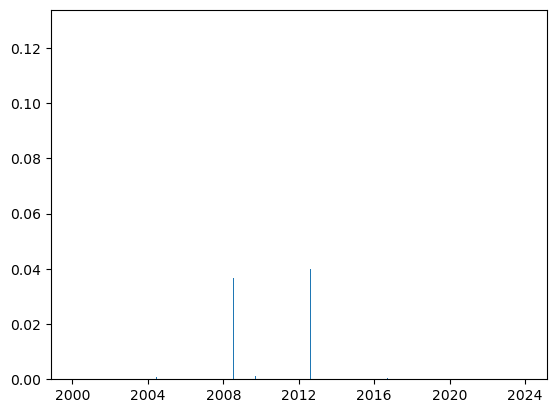

In [151]:
plt.bar(Pr_Rain.time, Pr_Rain.values)

In [152]:
Pr_Snow

<xarray.DataArray 'SF' (time: 288)> Size: 1kB
[288 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 2kB 2000-01-16T12:00:00 ... 2023-12-16T12:...
    X        float32 4B -270.0
    Y        float32 4B 290.0
Attributes:
    long_name:     Snowfall
    units:         mmWE/day
    cell_methods:  TIME: sum TIME: mean
    history:       From ICE.a98.2000.01.01-31

<BarContainer object of 288 artists>

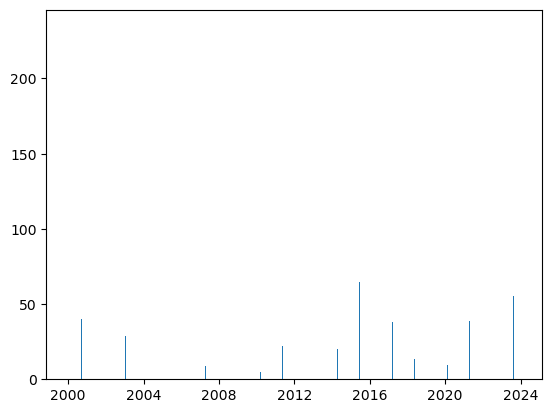

In [153]:
plt.bar(Pr_Snow.time, Pr_Snow.values)

In [154]:
Pr_Snow_monthly_cycle

<xarray.DataArray 'SF' (month: 12)> Size: 48B
array([ 691.8632 ,  740.7787 ,  720.28796,  549.6788 ,  691.79926,
       1222.8699 , 2162.7114 , 2757.2515 , 1562.7183 ,  528.20325,
        180.02025,  285.79883], dtype=float32)
Coordinates:
    X        float32 4B -270.0
    Y        float32 4B 290.0
  * month    (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12
Attributes:
    long_name:     Snowfall
    units:         mmWE/day
    cell_methods:  TIME: sum TIME: mean
    history:       From ICE.a98.2000.01.01-31

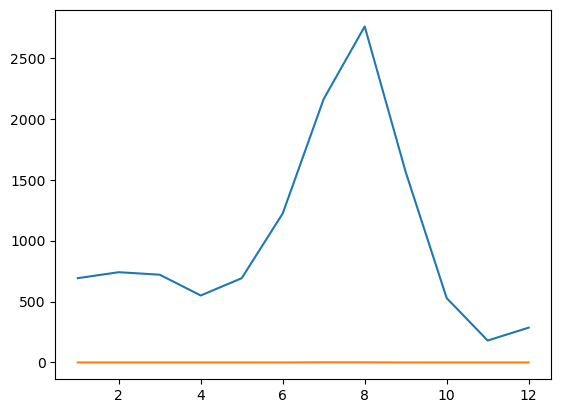

In [155]:
plt.plot(Pr_Snow_monthly_cycle.month, Pr_Snow_monthly_cycle.values)
plt.plot(Pr_Rain_monthly_cycle.month, Pr_Rain_monthly_cycle.values)

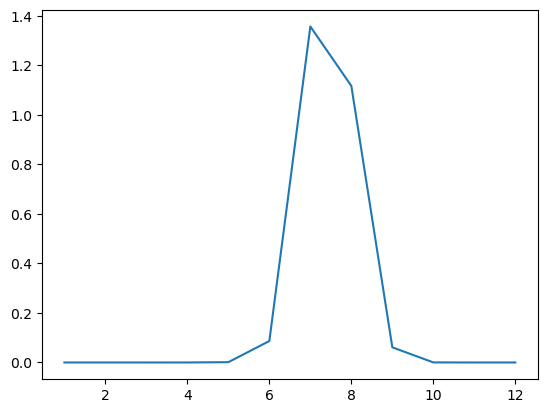

In [156]:
plt.plot(Pr_Rain_monthly_cycle.month, Pr_Rain_monthly_cycle.values)

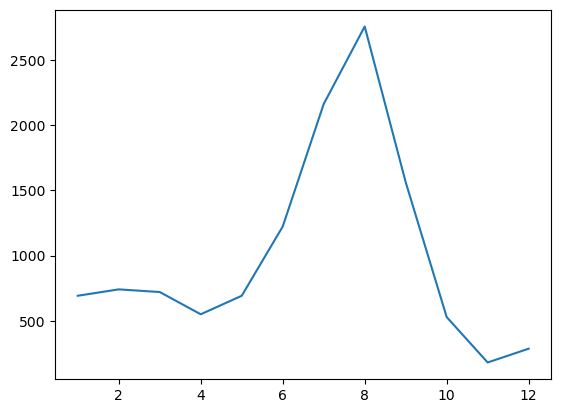

In [157]:
plt.plot(Pr_Snow_monthly_cycle.month, Pr_Snow_monthly_cycle.values)

In [159]:
dsMP=dsM_RF+dsM_SF


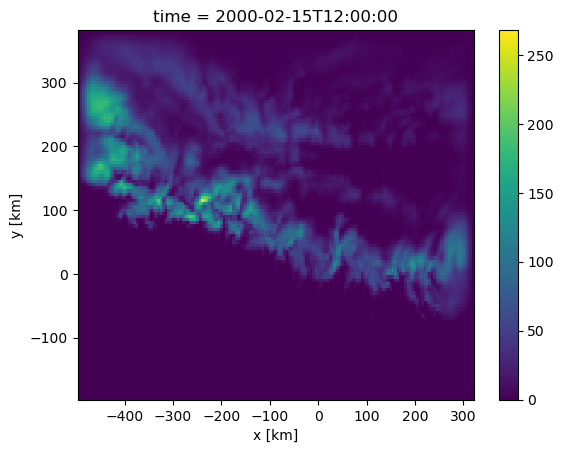

In [160]:
dsMP[1,:,:].plot()

In [161]:
Pr_MAR=dsMP[0:, i, j]
#T MAR classic climate variables
PrMAR_monthly_cycle=Pr_MAR.groupby('time.month').sum()

#dsM_sta_new


PrMAR_premon = seasonsdata(Pr_MAR, 'MAM').resample(time='YE').sum()

PrMAR_mon = seasonsdata(Pr_MAR, 'JJAS').resample(time='YE').sum()

PrMAR_postmon =  seasonsdata(Pr_MAR, 'ON').resample(time='YE').sum()

PrMAR_hiver  = seasonsdata(Pr_MAR, 'DJF').resample(time='YE').sum()


#Time series annual data MAR 
Timeseries_PrMAR_premon = seasonsdata(Pr_MAR, 'MAM').resample(time='YE').sum() # T moyen de chaque saison 
Timeseries_PrMAR_mon = seasonsdata(Pr_MAR, 'JJAS').resample(time='YE').sum()
Timeseries_PrMAR_postmon =  seasonsdata(Pr_MAR, 'ON').resample(time='YE').sum()
Timeseries_PrMAR_hiver  = seasonsdata(Pr_MAR, 'DJF').resample(time='YE').sum()


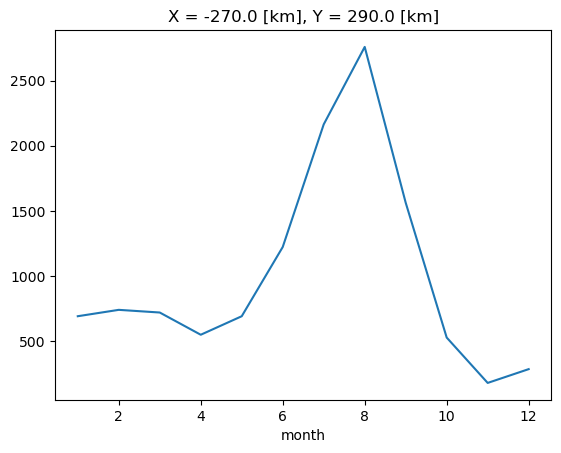

In [162]:
PrMAR_monthly_cycle.plot()